In [1]:
### Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset

df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\pga24\ML Projects\USup_project1.csv")

In [3]:
df1 = df

In [4]:
df.shape #checking size/shape of the data i.e. no. rows and columns in dataset

(7176, 21)

In [5]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7128 non-null   object 
 1   gender            7176 non-null   object 
 2   SeniorCitizen     7176 non-null   int64  
 3   Partner           7176 non-null   object 
 4   Dependents        7176 non-null   object 
 5   tenure            7176 non-null   int64  
 6   PhoneService      7176 non-null   object 
 7   MultipleLines     7176 non-null   object 
 8   InternetService   7176 non-null   object 
 9   OnlineSecurity    7176 non-null   object 
 10  OnlineBackup      7176 non-null   object 
 11  DeviceProtection  7176 non-null   object 
 12  TechSupport       7176 non-null   object 
 13  StreamingTV       7176 non-null   object 
 14  StreamingMovies   7176 non-null   object 
 15  Contract          7159 non-null   object 
 16  PaperlessBilling  7176 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True) # using fillna to replace NaN values with the mean

print(df['TotalCharges'].dtype)

float64


In [8]:
df.isnull().sum()

customerID          48
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract            17
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [9]:
## Missing value treatement

In [10]:
df['customerID'].nunique()

6995

In [11]:
df.dropna(subset=['customerID'], inplace = True)

In [12]:
df['customerID'].isnull().sum()

0

In [13]:
df['Contract'].unique()

array(['Month-to-month', 'One year', nan, 'Two year'], dtype=object)

In [14]:
df['Contract'].nunique()

3

In [15]:
df['Contract'].fillna(method='ffill', inplace=True)

In [16]:
df['Contract'].isnull().sum()

0

In [17]:
### Checking if duplicate values in dataset

df.duplicated().sum()

133

In [18]:
### Removing duplicate values from the dataset

df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Modifying some columns

df['MultipleLines'].replace('No phone service', 'No', inplace=True)

for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[i].replace('No internet service', 'No', inplace=True)
    
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
# dropping customerID column as it is not useful for analysis

df.drop('customerID', axis=1, inplace=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6995.000000,6995.000000,6995.000000,6995.000000
mean,0.162116,32.359543,64.771744,2282.564545
std,0.368583,24.566009,30.081579,2264.949831
min,0.000000,0.000000,18.250000,18.850000
25%,0.000000,9.000000,35.575000,402.225000
50%,0.000000,29.000000,70.350000,1400.300000
75%,0.000000,55.000000,89.850000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


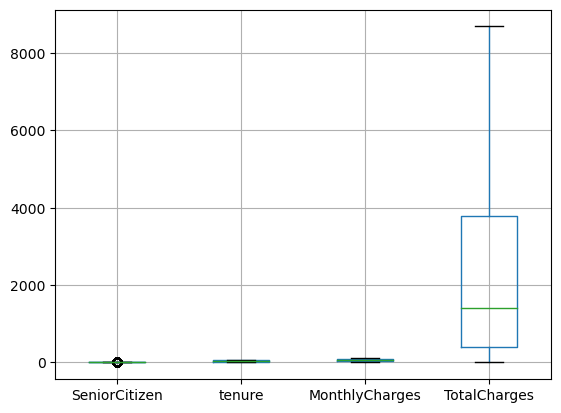

In [23]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns

df.boxplot(numerical_features.columns.to_list())
df.describe()

In [24]:
fig,ax= plt.subplots(8,2,figsize=(20,30))
ax=ax.flatten()
column = ['SeniorCitizen', 'Partner','Dependents','PhoneService',
          'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
          'Contract','PaperlessBilling','PaymentMethod','Churn']
for i,column in enumerate(df[column]):
    sns.countplot(x=df[column],ax=ax[i])
    

In [25]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [26]:
df2=df

In [27]:
columns_to_encode = ['Partner','Churn', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

df2[columns_to_encode] = df2[columns_to_encode].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


In [28]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [29]:
# create dummies against 'gender'
df2 = pd.get_dummies(df,columns=['gender'])     
df2 = df2.drop(['InternetService','Contract','PaymentMethod'], axis=1)
# head() to display top five rows
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0


In [30]:
df3= df2.drop(['gender_Female','gender_Male','Churn'], axis=1)

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# creating a list for different values of K
n_clusters = [2,3, 4,5,6, 7, 8,9,10]


# 'silhouette_score' function computes the silhouette score for each K

for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df3)
    
    score = silhouette_score(df3, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.7022505382924912)
For n_clusters = 3, silhouette score is 0.6436507139605637)
For n_clusters = 4, silhouette score is 0.6019319137680269)
For n_clusters = 5, silhouette score is 0.5958136419482485)
For n_clusters = 6, silhouette score is 0.5934446399324192)
For n_clusters = 7, silhouette score is 0.5845933243704076)
For n_clusters = 8, silhouette score is 0.5693364035392244)
For n_clusters = 9, silhouette score is 0.565965734057272)
For n_clusters = 10, silhouette score is 0.5628302205107537)


In [32]:
k = 2  

# Fit K-Means model
model = KMeans(n_clusters=k, random_state=10)
model.fit(df3)


KMeans(n_clusters=2, random_state=10)

In [33]:
data_output = df2.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Cluster
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,1
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,1


In [34]:
# Add the cluster labels to the original dataframe
data_output['Cluster'] = model.labels_


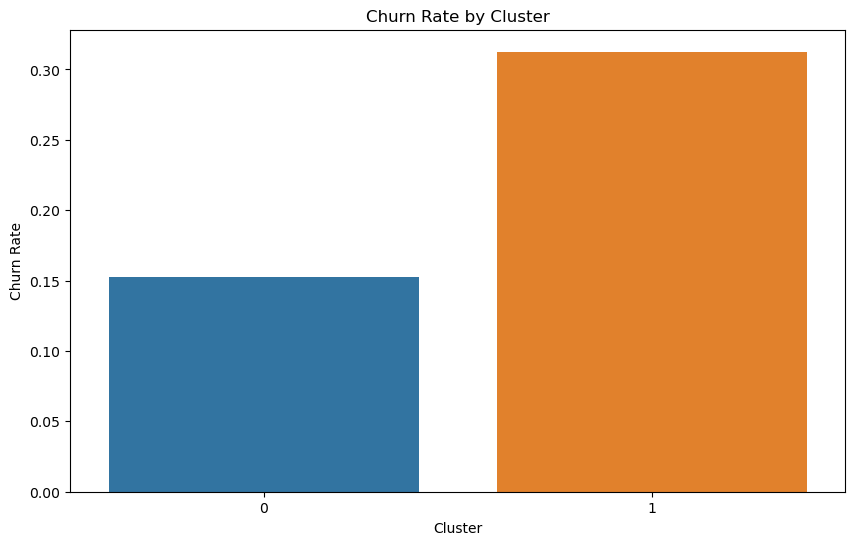

In [37]:
# Calculate Churn Rate for each cluster
churn_rate_by_cluster = data_output.groupby('Cluster')['Churn'].mean()

# Visualize Churn Rate by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_cluster.index, y=churn_rate_by_cluster.values)
plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()


**Churn Rate by Cluster:-** This plot shows the average churn rate for each cluster. Higher churn rate in 1st cluster indicates that customers in 1st cluster are more likely to churn.

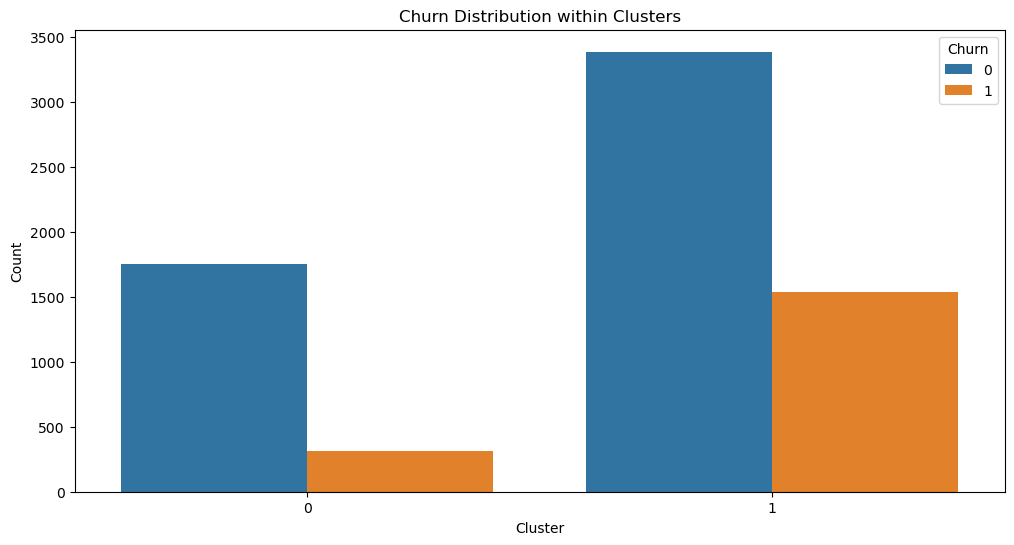

In [36]:
# Analyze Churn Distribution within each Cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=data_output, x='Cluster', hue='Churn')
plt.title('Churn Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

**Churn Distribution within Clusters:-** This plot shows the distribution of churned and non-churned customers within each cluster. This plot shows 1st cluster with a higher proportion of churned customers.